In [1]:
pwd

'C:\\Users\\Pakistan Computers'

In [53]:
import numpy as np
from numpy import cov
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import spearmanr
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('heart.csv')

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
data.groupby(['target','sex']).median()

age   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
target sex                                                                      
0      0    60.5  0.0     140.0  265.5  0.0      0.0    145.5    1.0     1.60   
       1    57.5  0.0     130.0  247.5  0.0      0.0    141.0    1.0     1.40   
1      0    54.0  2.0     130.0  249.0  0.0      1.0    159.0    0.0     0.25   
       1    52.0  2.0     130.0  228.0  0.0      1.0    163.0    0.0     0.10   

            slope   ca  thal  
target sex                    
0      0      1.0  1.5   3.0  
       1      1.0  1.0   3.0  
1      0      2.0  0.0   2.0  
       1      2.0  0.0   2.0

<AxesSubplot:xlabel='target', ylabel='count'>

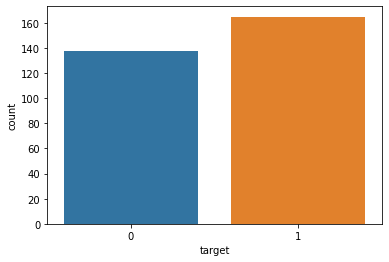

In [12]:
sns.countplot(data['target'])

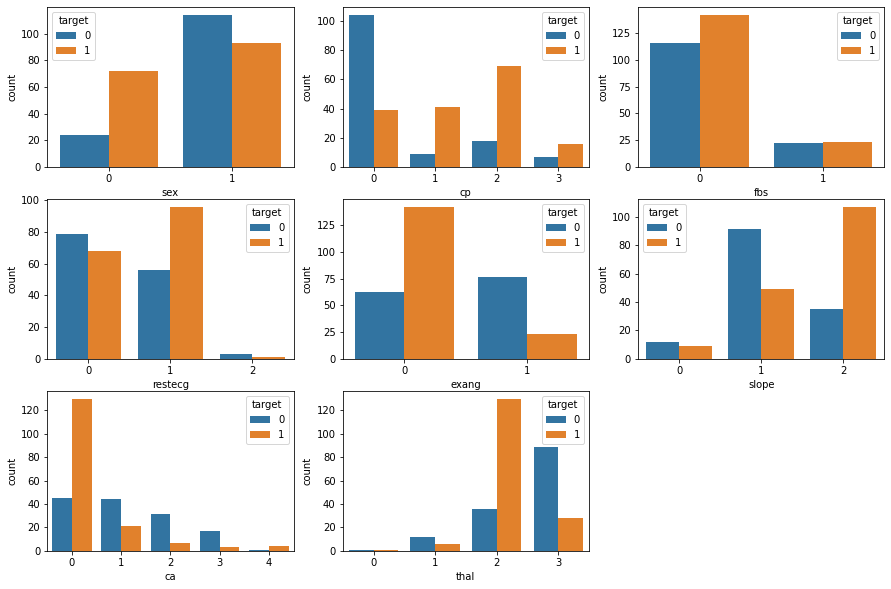

In [13]:
list = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
m=1
plt.figure(figsize=(15,10))
for i in list:
    plt.subplot(3,3,m)
    sns.countplot(x=i,data=data,hue='target')
    m+=1

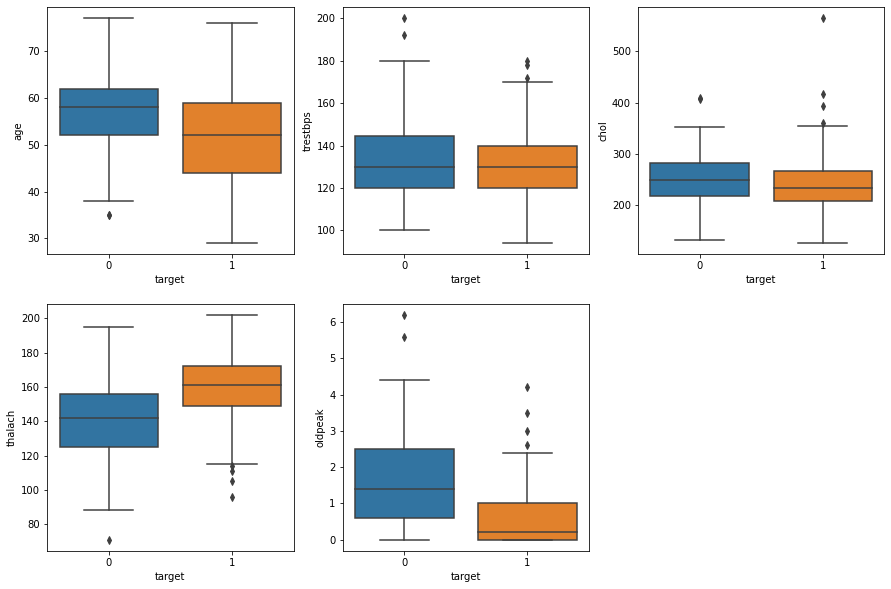

In [14]:
list = ['age','trestbps','chol','thalach','oldpeak']
m=1
plt.figure(figsize=(15,10))
for i in list:
    plt.subplot(2,3,m)
    sns.boxplot(y=i,data=data,x='target')
    m+=1

In [51]:
cova=cov(data['target'],data['sex'])
print(cova)

[[ 0.24883614 -0.06530719]
 [-0.06530719  0.21716609]]


In [54]:
corr,_=spearmanr(data['target'],data['sex'])
print(corr)

-0.280936575501767


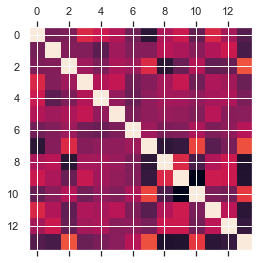

In [56]:
plt.matshow(data.corr())
plt.show()

In [ ]:
#New Data set of stroke

In [15]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [16]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 379.3+ KB


In [19]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [21]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index
numerical_columns = df.dtypes[df.dtypes != 'object'].index

In [22]:
categorical_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [23]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:>

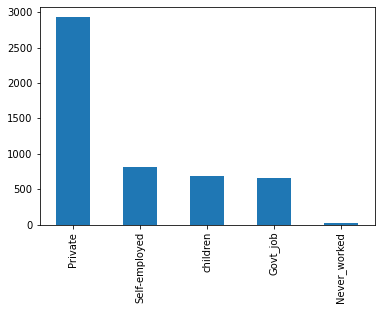

In [24]:
df['work_type'].value_counts().plot(kind = 'bar')

In [25]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<AxesSubplot:>

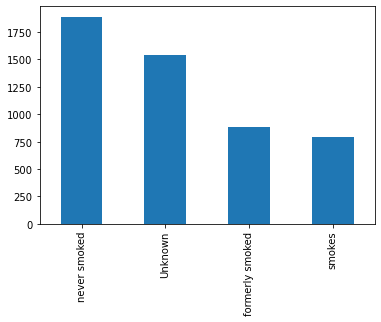

In [26]:
df['smoking_status'].value_counts().plot(kind = 'bar')

In [27]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [28]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

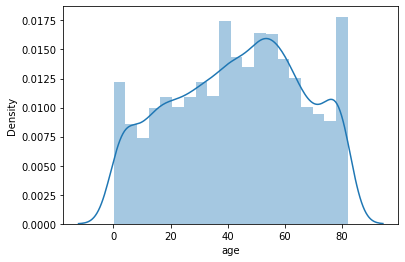

In [29]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

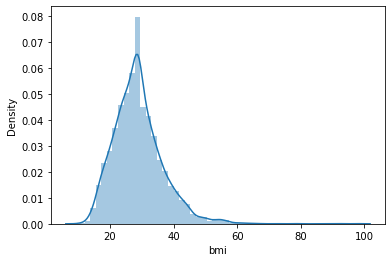

In [30]:
sns.distplot(df['bmi'])

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

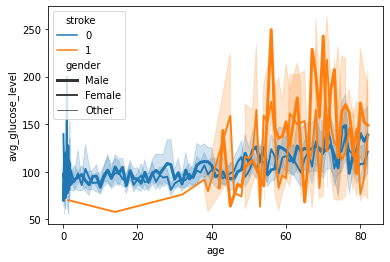

In [32]:
sns.lineplot(x = 'age',y = 'avg_glucose_level',hue = 'stroke',size='gender', data =df)

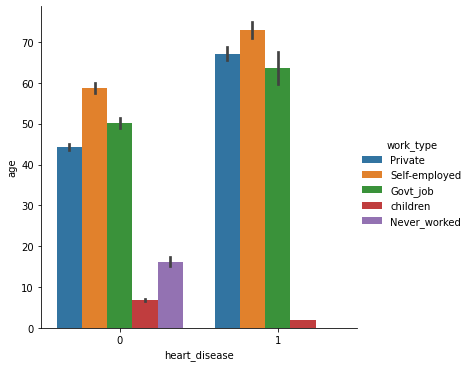

In [33]:
sns.catplot(x='heart_disease',y='age', hue="work_type", kind="bar", data=df)

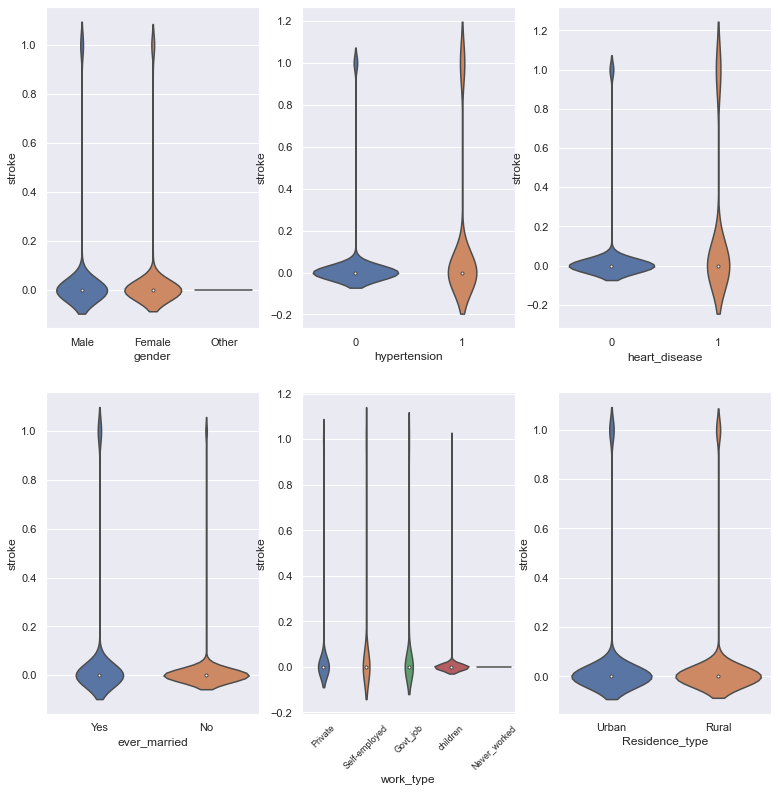

In [34]:
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = df)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = df)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = df)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'stroke', data = df)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'stroke', data = df)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = df)
plt.show()

In [35]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

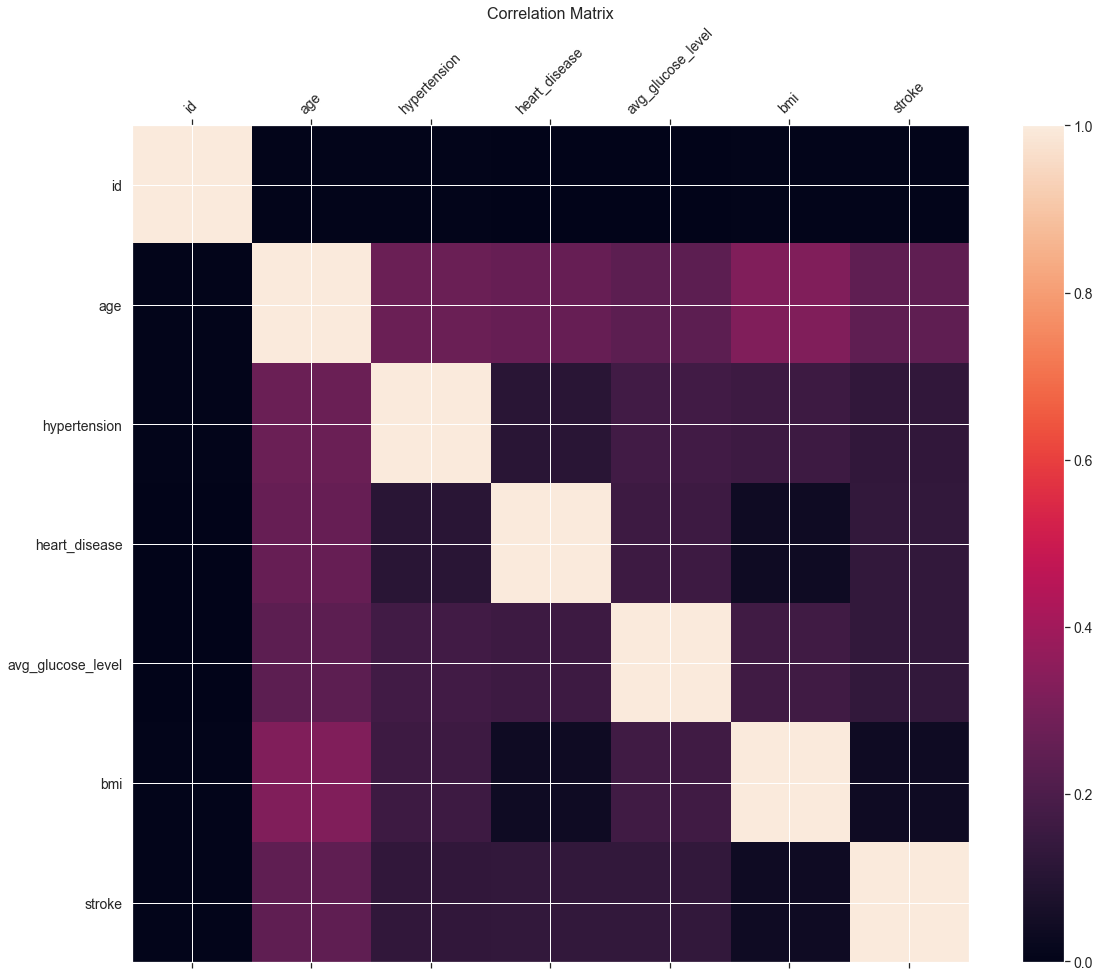

In [58]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
#datset of Heart-failure-clinical-records-dataset

In [37]:
df1=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [38]:
df1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [42]:
df1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [43]:
df1['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

<AxesSubplot:>

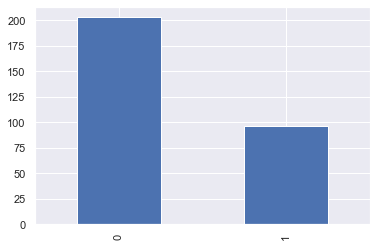

In [45]:
df1['smoking'].value_counts().plot(kind = 'bar')

In [46]:
df1['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

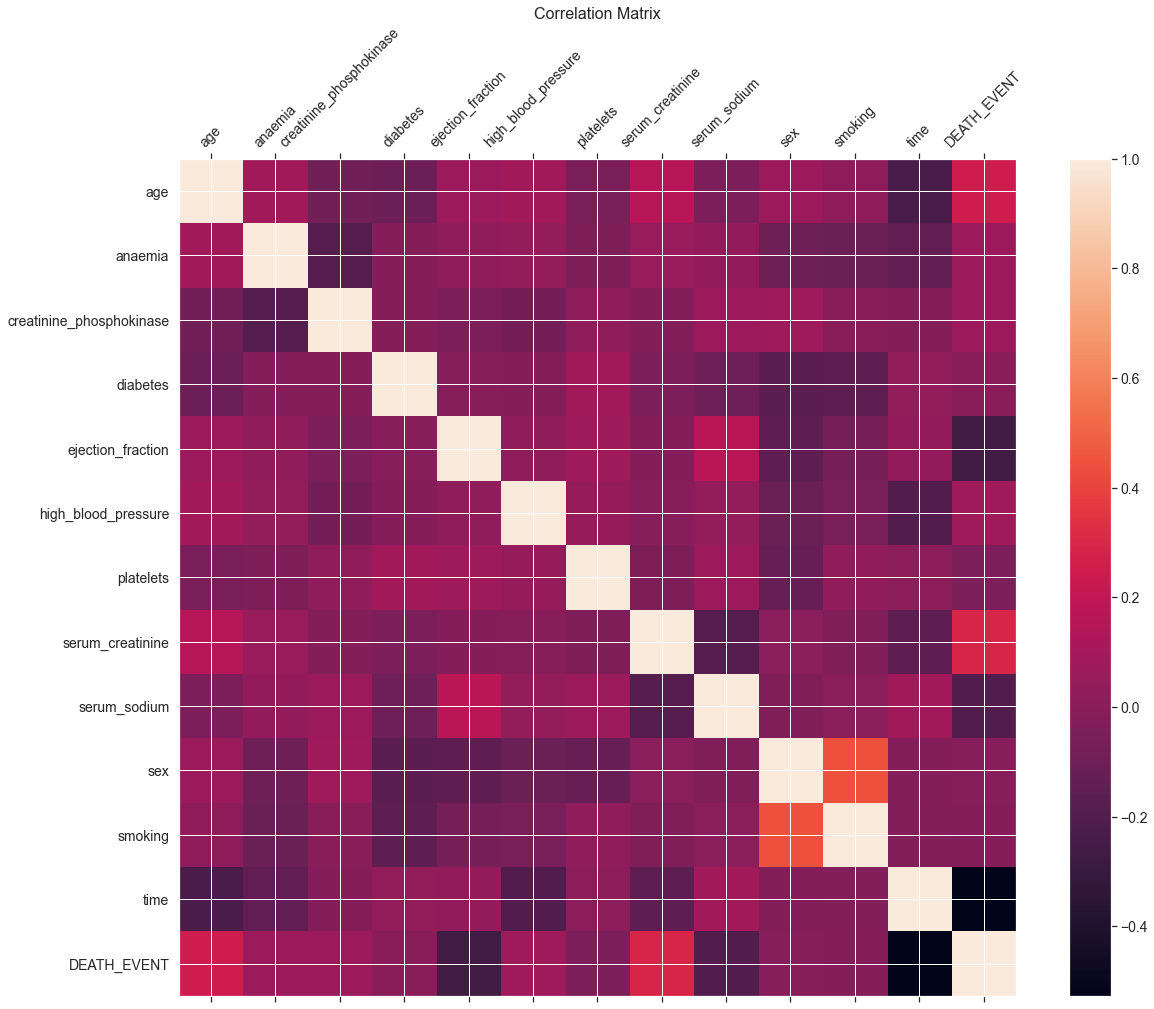

In [59]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [63]:
X = data.drop('target',axis=1)
Y = data['target']

In [ ]:
#Machine Learning Algorithm KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [68]:
from sklearn.metrics import accuracy_score,classification_report

In [69]:
accuracy = []
for i in range(1,40):    
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,Y_train)
    predK = kn.predict(X_test)
    accuracy.append([accuracy_score(Y_test,predK),i])
    #print('Tested for k =',i)
temp = accuracy[0]
for m in accuracy:
    if temp[0] < m[0]:
        temp=m
knn = KNeighborsClassifier(n_neighbors=temp[1])

In [70]:
knn.fit(X_train,Y_train)
score=accuracy_score(Y_test,knn.predict(X_test))
print(score)

0.9180327868852459
